In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Setting up the CSV's

In [2]:
#reading csv of crime data from the Marshall Project (nonprofit news org covering the U.S. criminal justice system)
#skip 138 rows so data starts from '77 not '75
crime = pd.read_csv('data/crime_data.csv', skiprows=list(range(1,139)))

#reading csv of city spending from the Lincoln Institute (nonprofit research for solutions to economic/social issues)
spending_all = pd.read_csv('data/spending_data.csv') #1977 - 2015

#only taking columns that are relavant to my project and/or have sufficent usable data points (few zero, Nan values)
spending = spending_all[['year',
                         'City',
                        'Libraries Expenditure', 
                        'Public Welfare Expenditure',
                         'Police Protection Expenditure',
                         'Corrections Expenditure']]

#making a crime rate metric that add up all violent crimes (homicide, rape, robbery, aggravated assault)
#divids by population and multiplies by 100K . this is an official metric according to
# the office of the California Attorney General
crime['crime_rate'] = (crime['violent_crime'] / crime['total_pop']) * 100000

#getting ready to merge csv's into one by manipulating the strings in the City or department_name columns
spending['City'] = spending['City'].str[4:-7] #remove first 4 chars and last 7
crime['department_name'] = crime['department_name'].apply(lambda x : x.split(',', 1)[0]) #split by comma

#merging two csv
merged = crime.merge(spending, left_on=['department_name', 'year'], right_on=['City','year'])

#dropping redundant and/or empty columns
perfect = merged.drop(labels=['source', 'City', 'url', 'months_reported', 'ORI'], axis=1)

#saving to csv, will be using this csv from now on
perfect.to_csv("data/master_data.csv")

In [33]:
#reading in master csv into variable 
data = pd.read_csv("data/master_data.csv")

In [81]:
#pulling data from master specific to a certain city and specific years
def pull_city(frame, place, start_year, end_year):
    return frame.loc[(frame['department_name'] == place) & (frame['year'] >= start_year) & (frame['year'] <= end_year)]

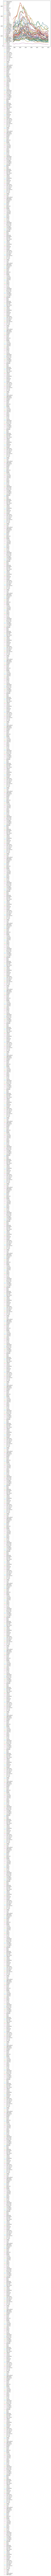

In [82]:
fig, ax = plt.subplots(figsize=(10, 10))
start = 1977
end = 2015
x = list(range(start, end+1))

indexes = []


for city in data['department_name']:
    ax.plot(x, pull_city(data, city, start, end)['crime_rate'], label=city)


ax.legend()